In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Encontar directorio actual
os.getcwd()

'c:\\Users\\dsaldias\\Desktop\\Costo fabril\\ENEA\\Costo_fabril'

In [3]:
df = pd.read_excel('Calculo perdidas costo fabril - ENEA.xlsx',sheet_name='Muestras_planta')
df.columns

Index(['Nombre MP', 'Peso tara', 'Peso bruto', 'Utensilio', 'Peso perdida',
       'Cantidad', 'Medicion', 'Perdida teorica', '% Error', '% Desv',
       '% Complem', '% Tot', 'Muestreo '],
      dtype='object')

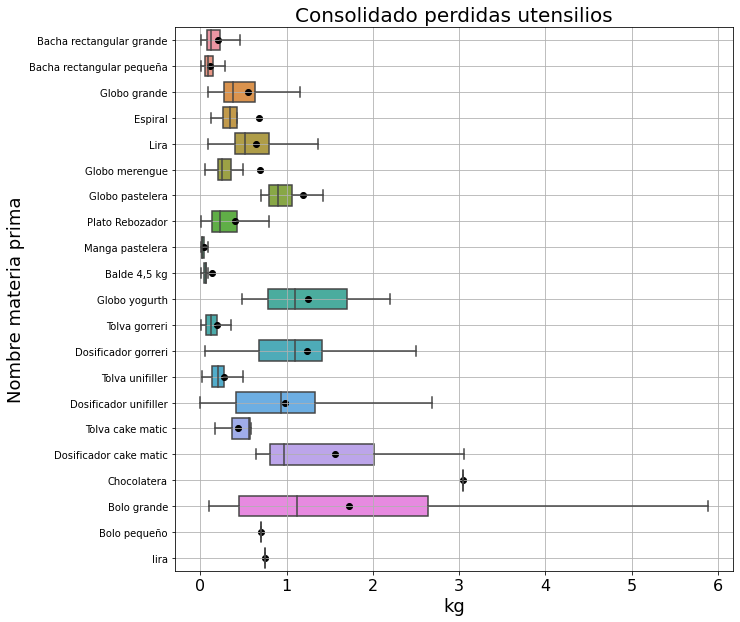

In [4]:
dt = df[df['Utensilio']!='Remojo gorreri']
ref = dt['Utensilio'].drop_duplicates()
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=dt,x='Peso perdida',y='Utensilio',showfliers=False)
ax.set_title('Consolidado perdidas utensilios',size=20)
ax.set_xlabel('kg',size=18)
ax.set_ylabel('Nombre materia prima',size=18)
ax.tick_params(axis='x',labelsize=16)
for ut in ref:
    df4 = dt[dt['Utensilio']==ut]
    ax.scatter(np.mean(df4['Peso perdida']),ut,c='k')
ax.grid()

C:\Users\dsaldias\AppData\Local\Temp\ipykernel_59760\2824268024.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(32,10))


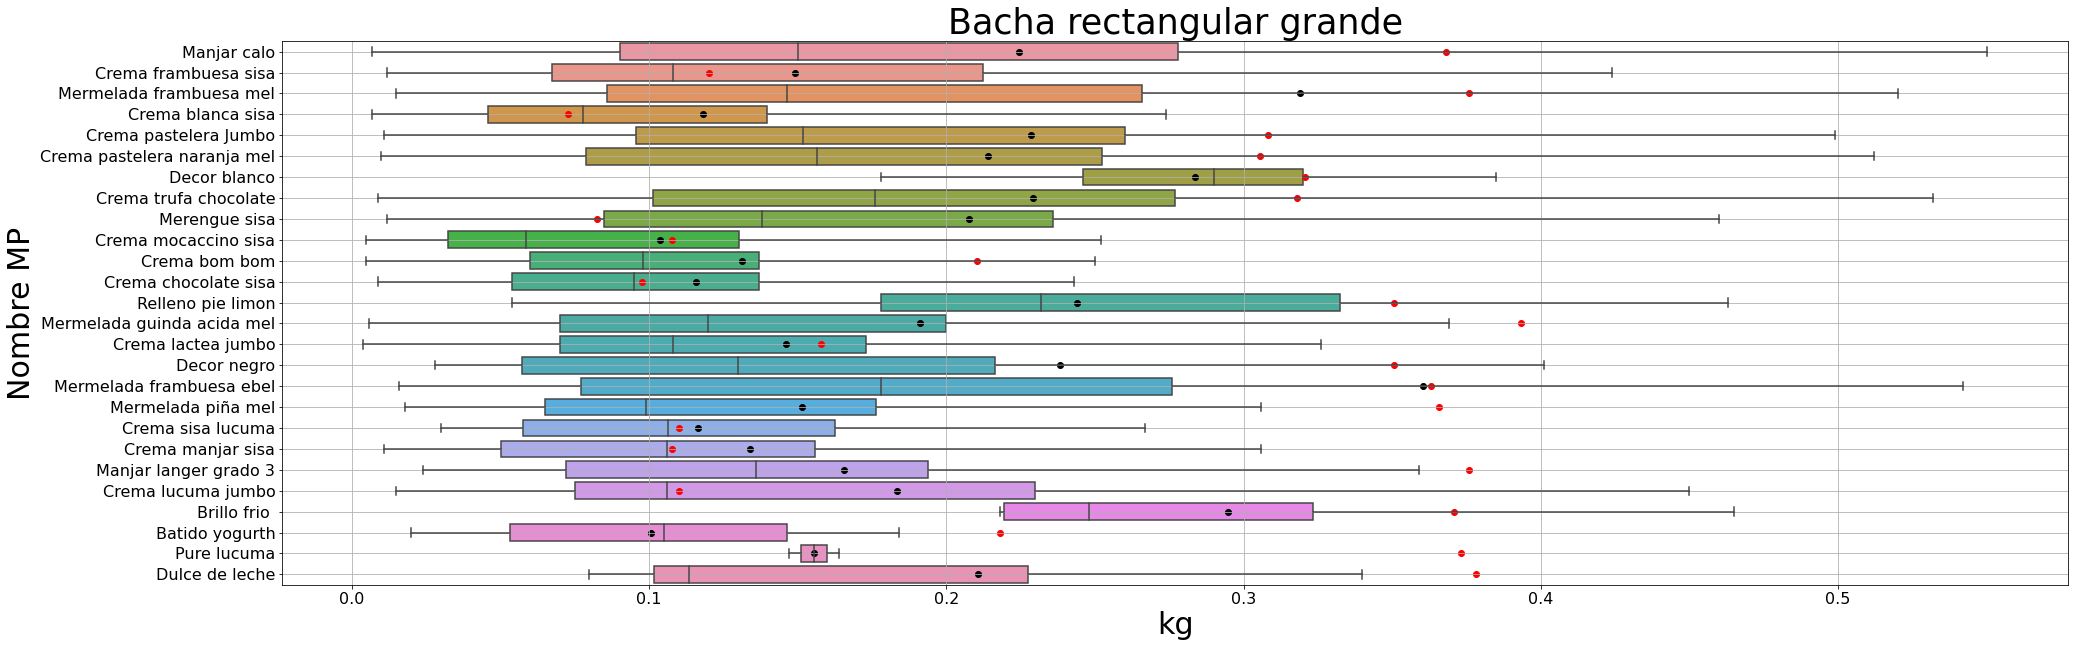

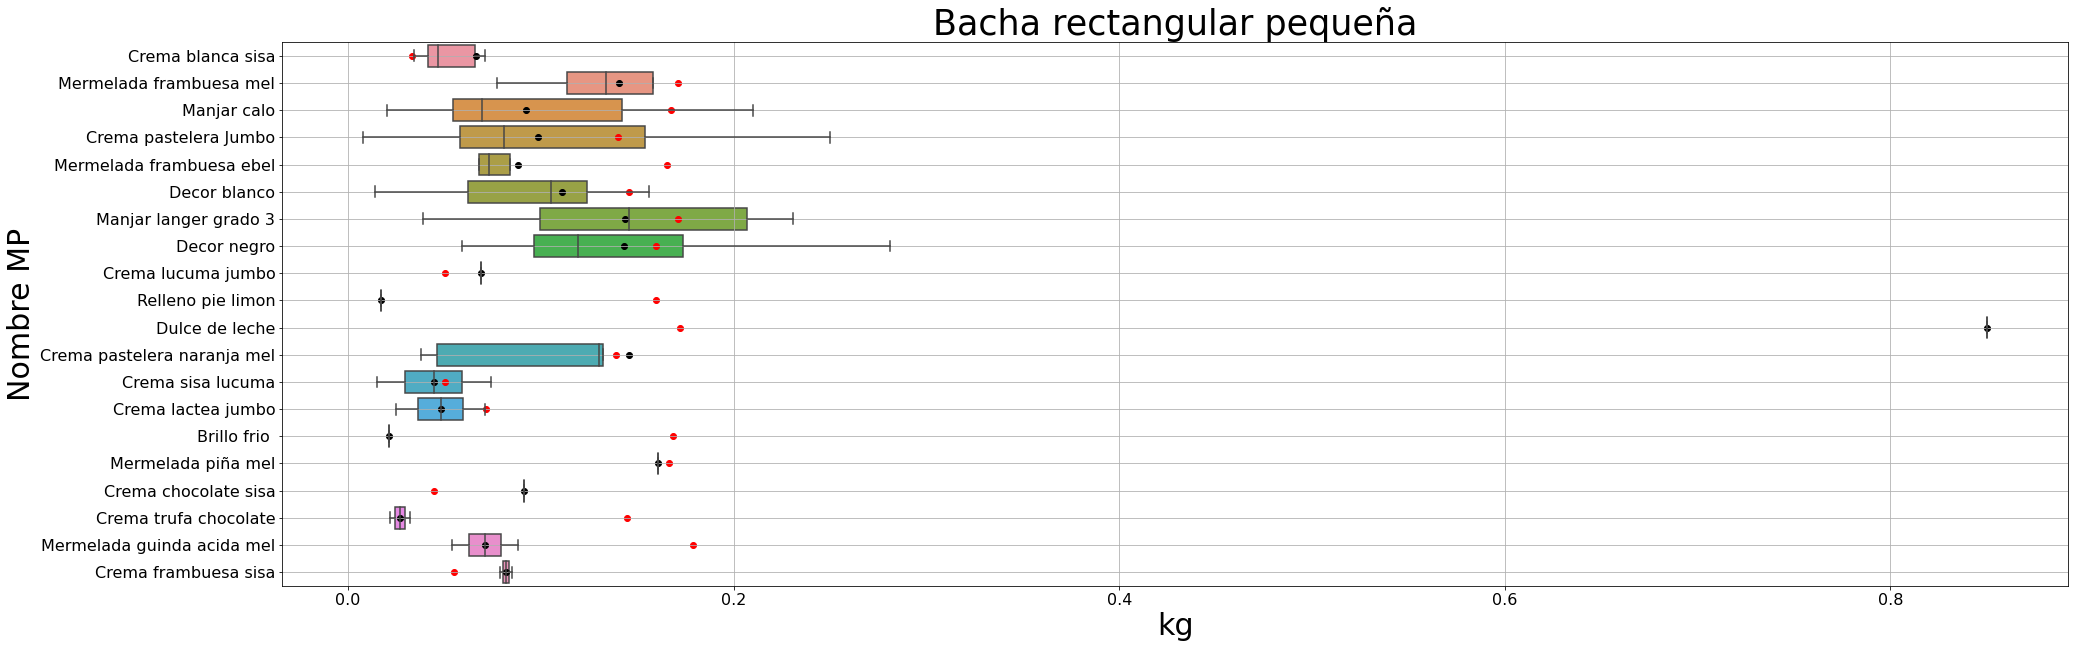

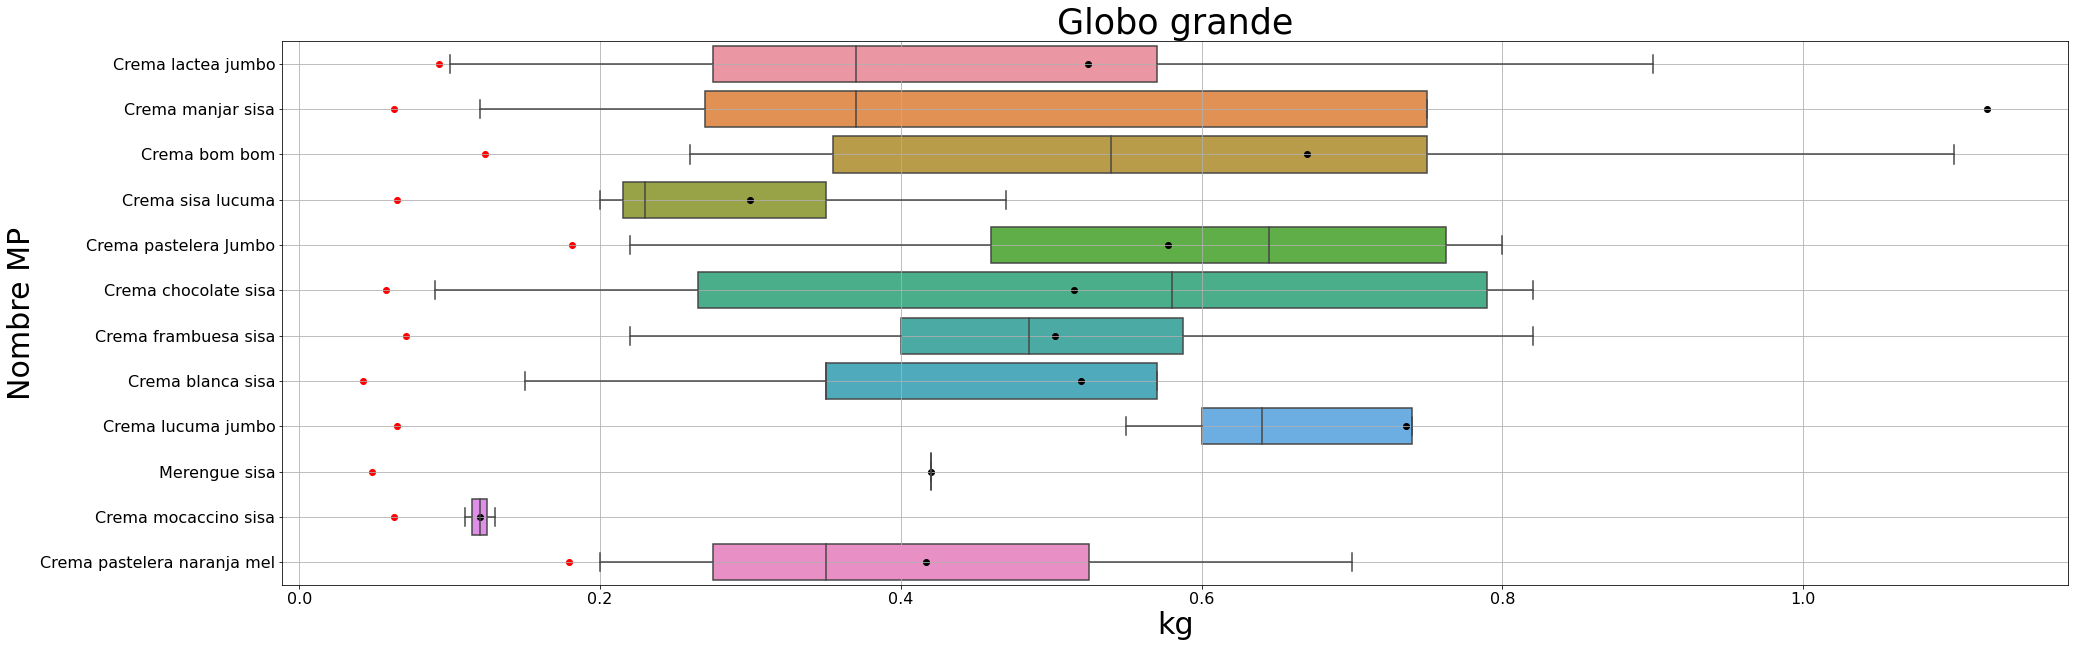

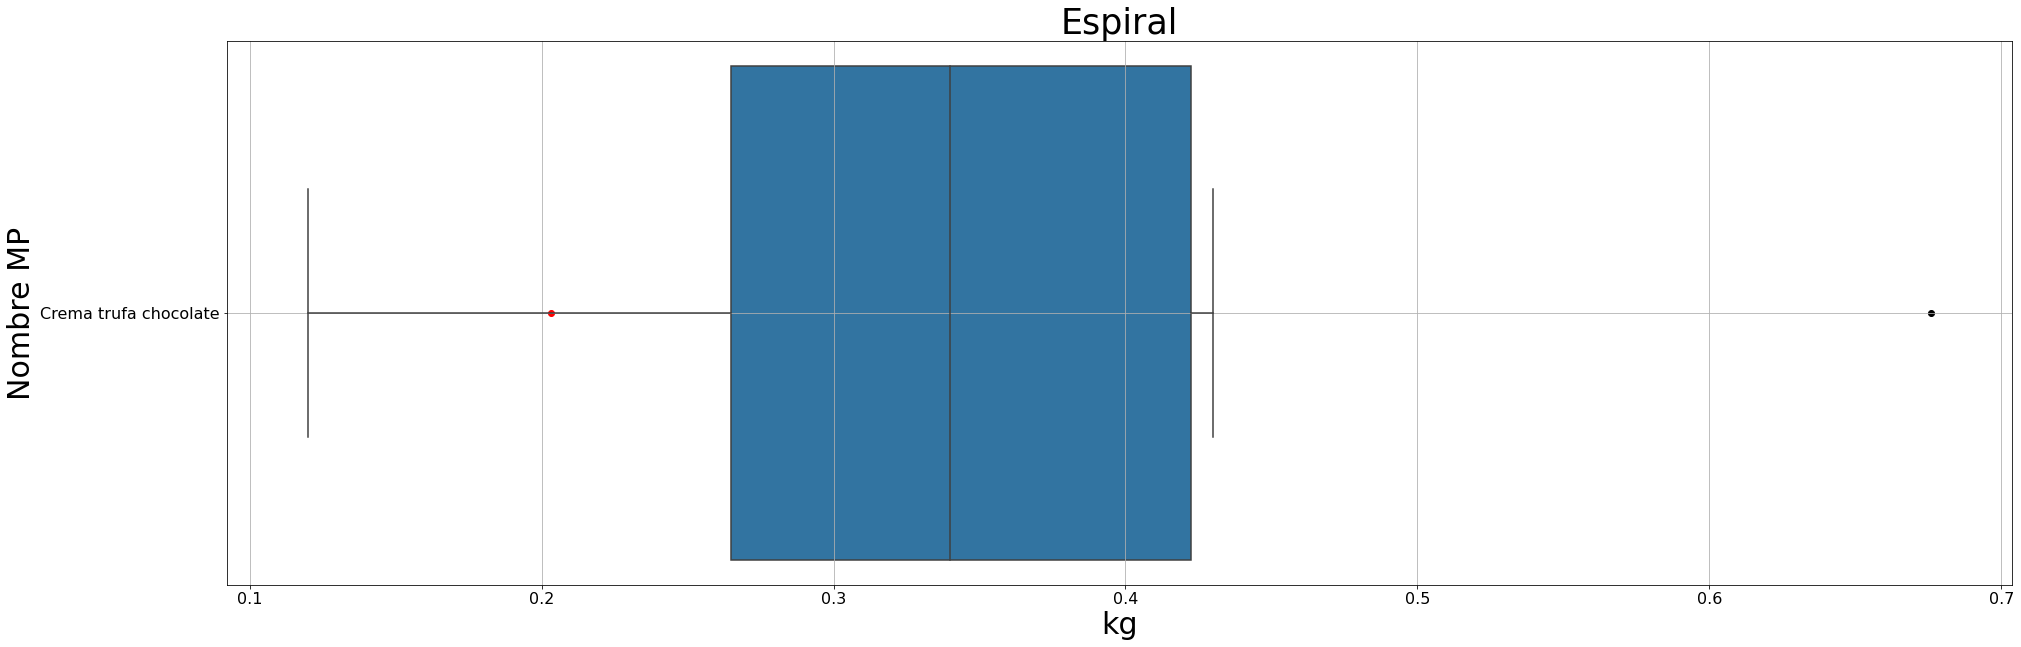

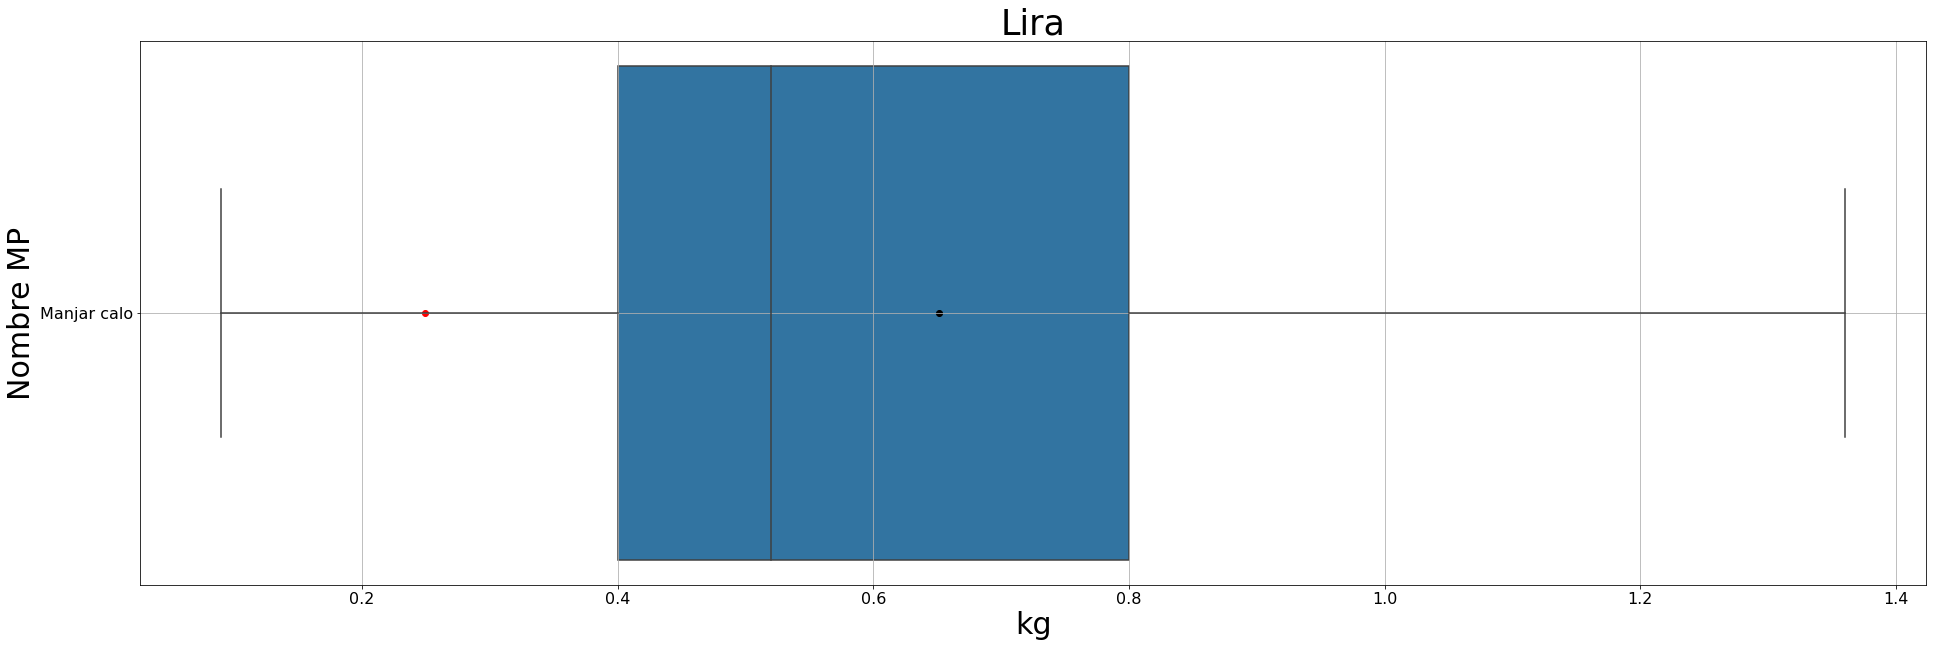

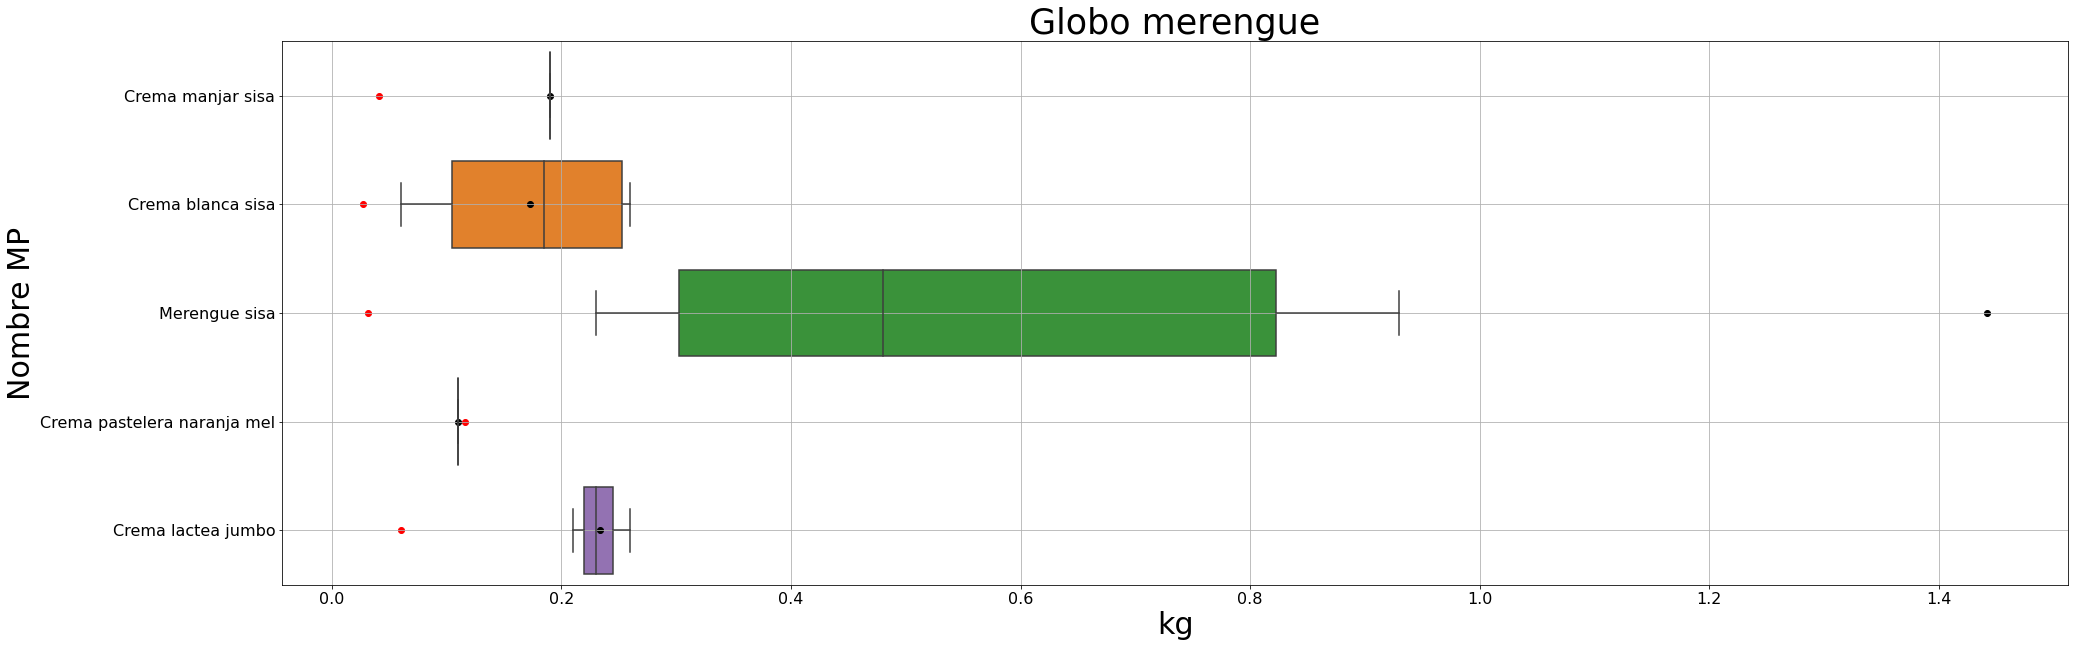

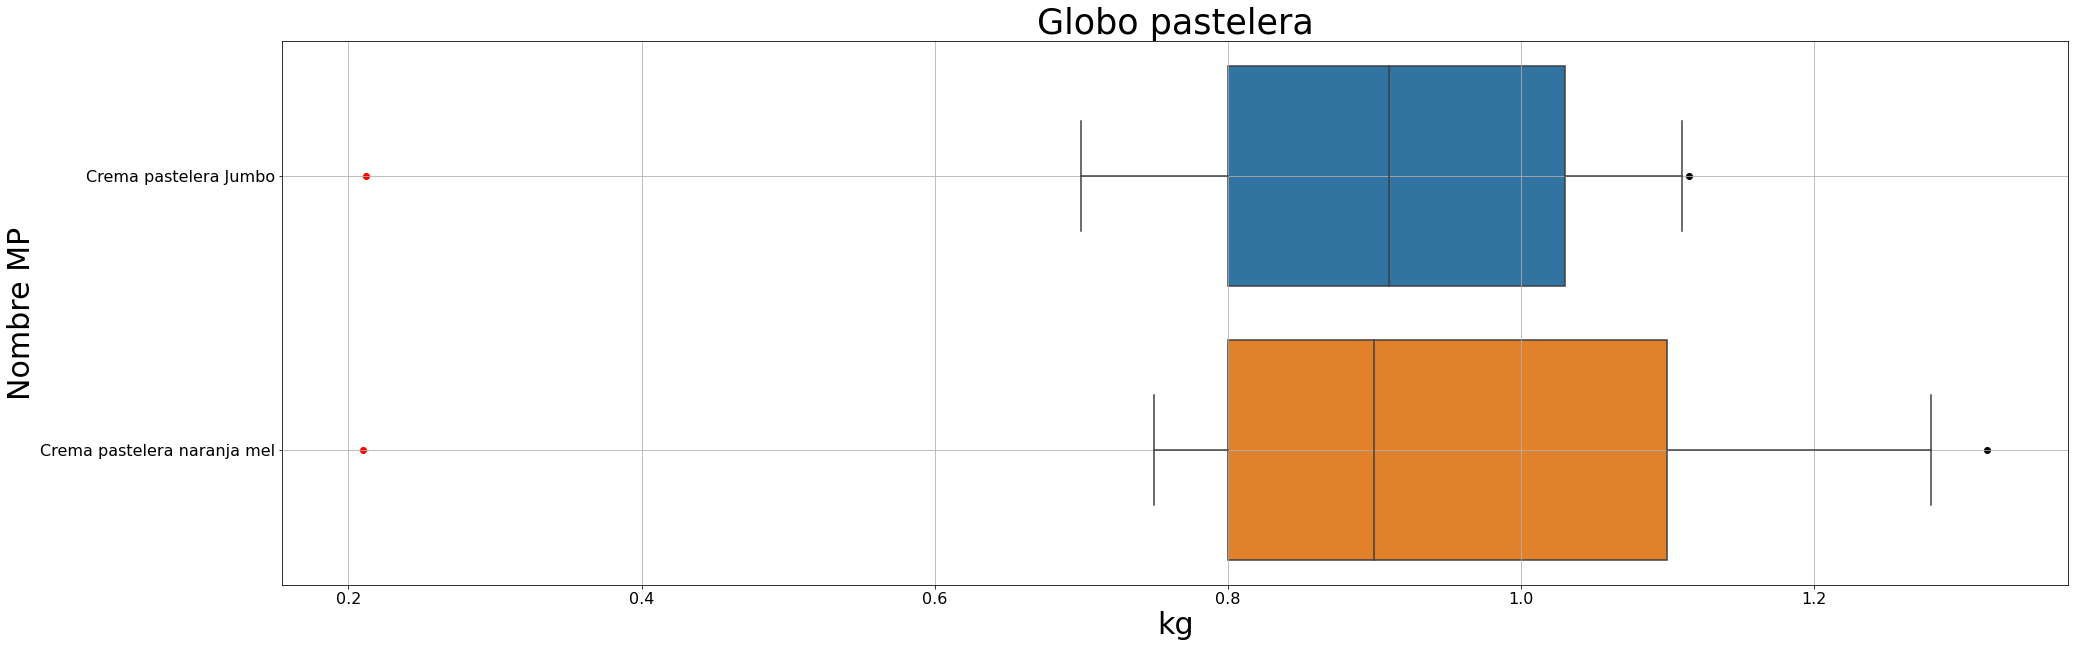

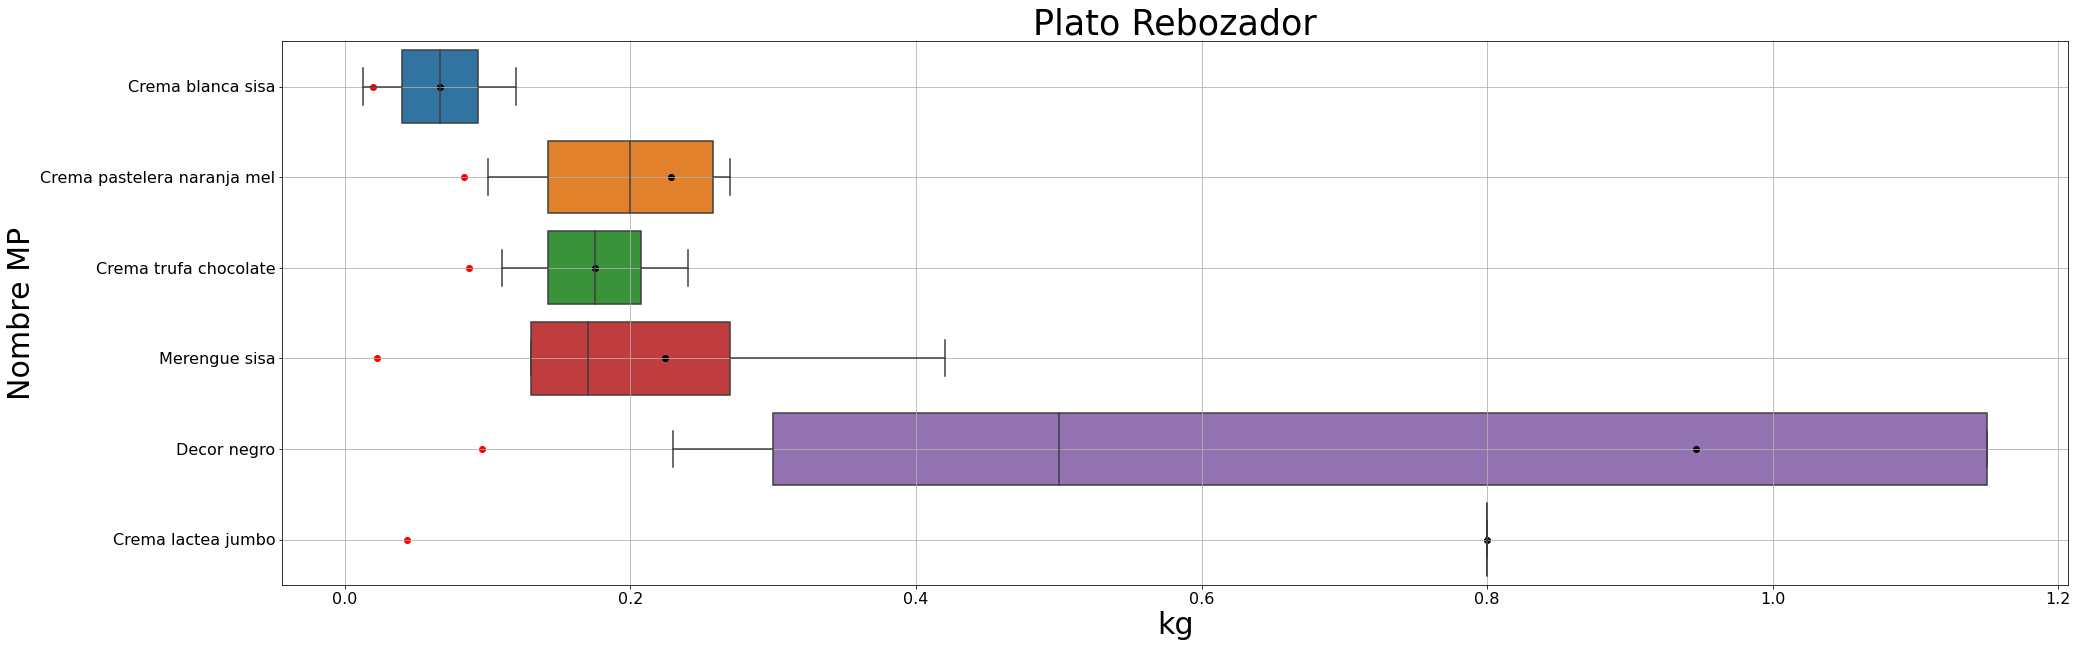

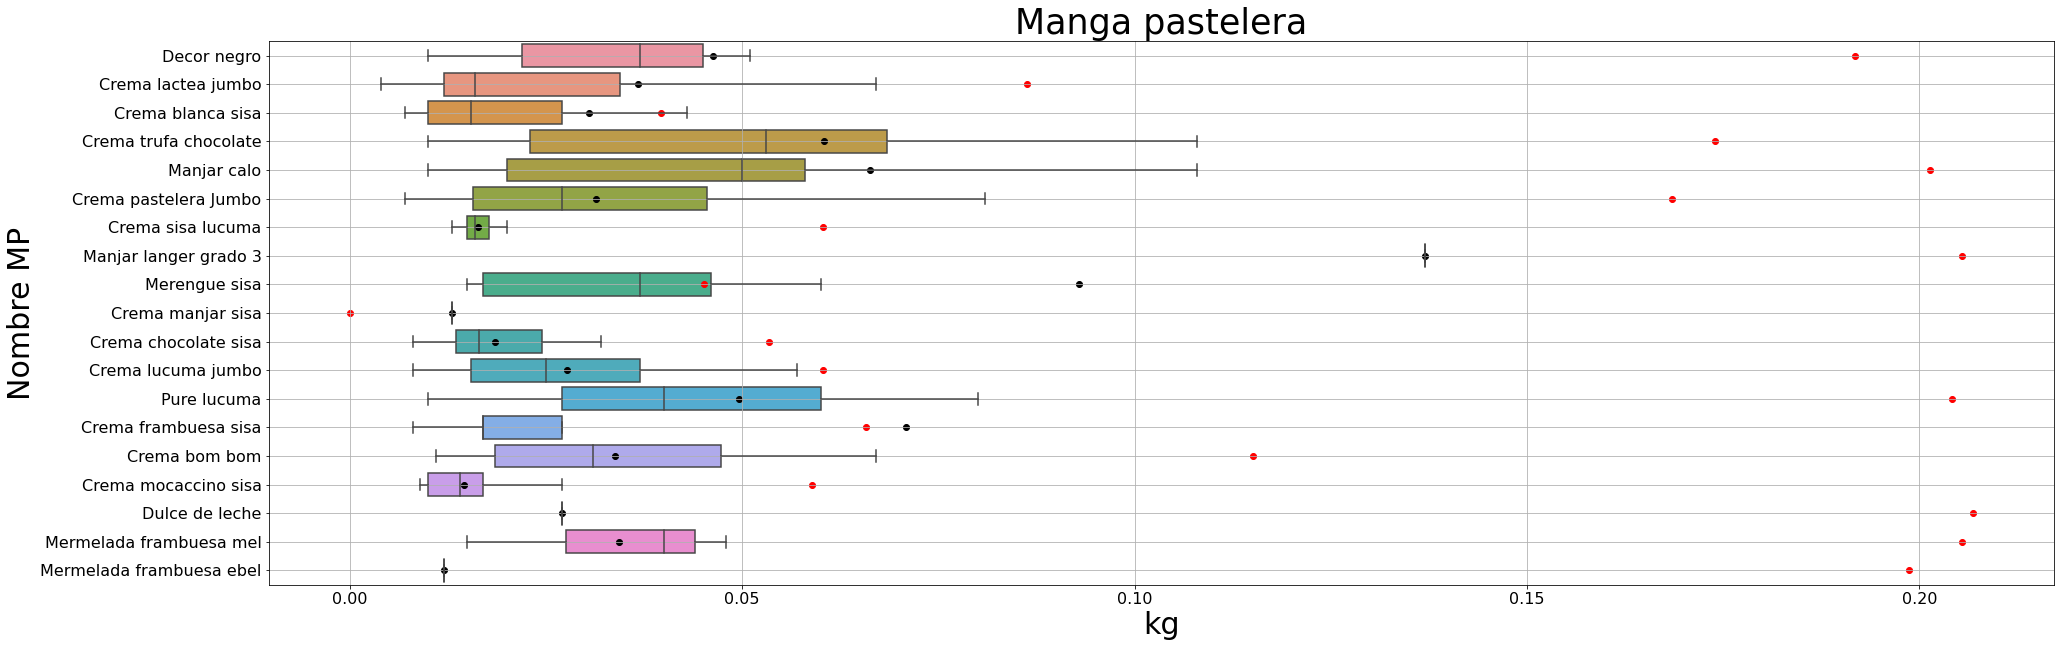

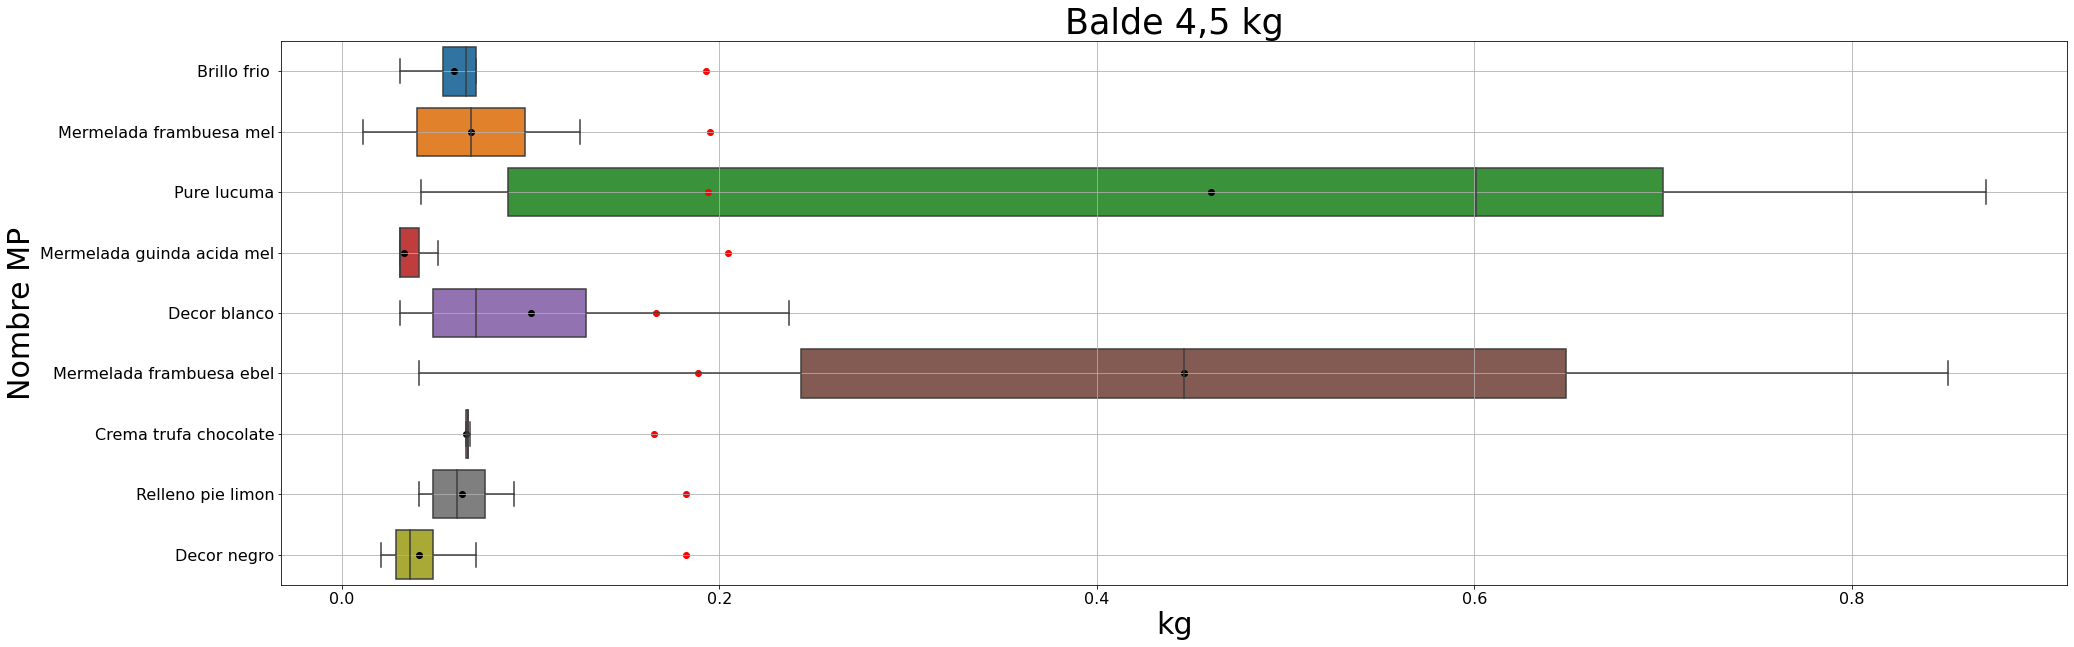

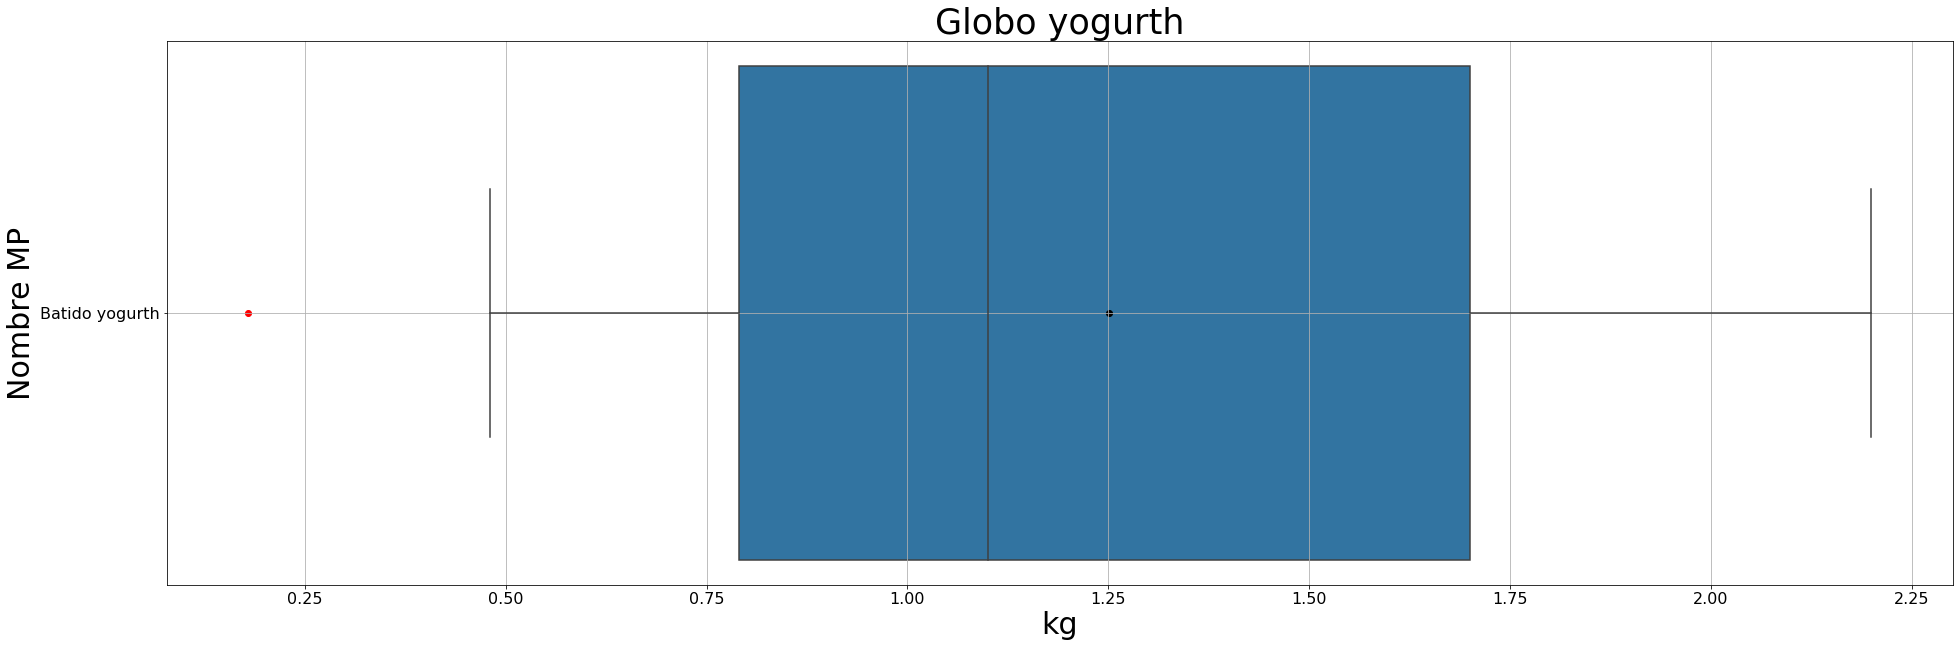

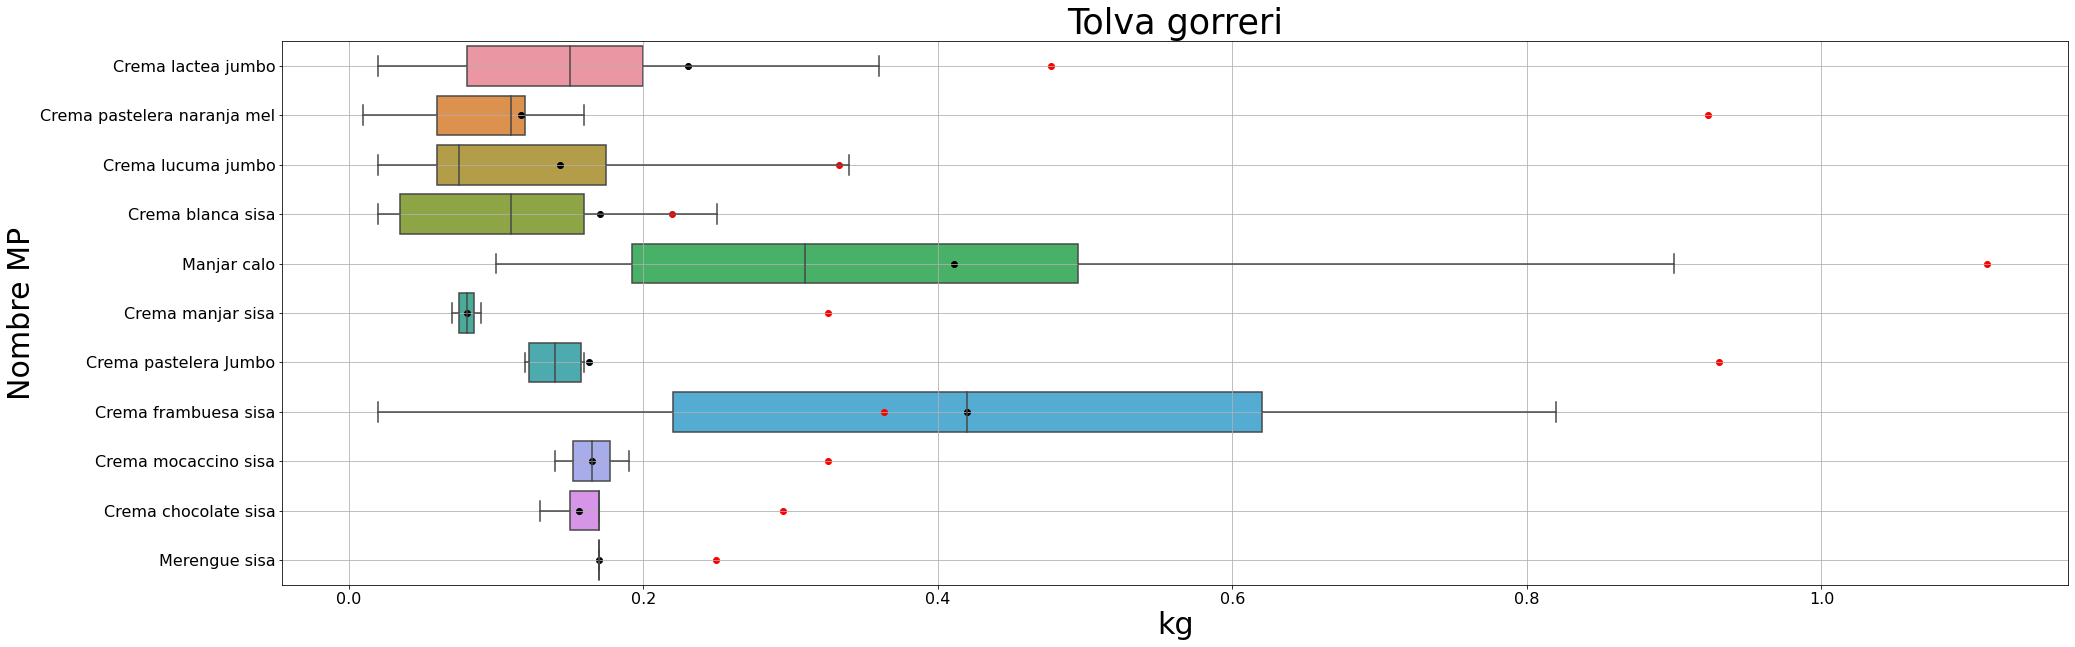

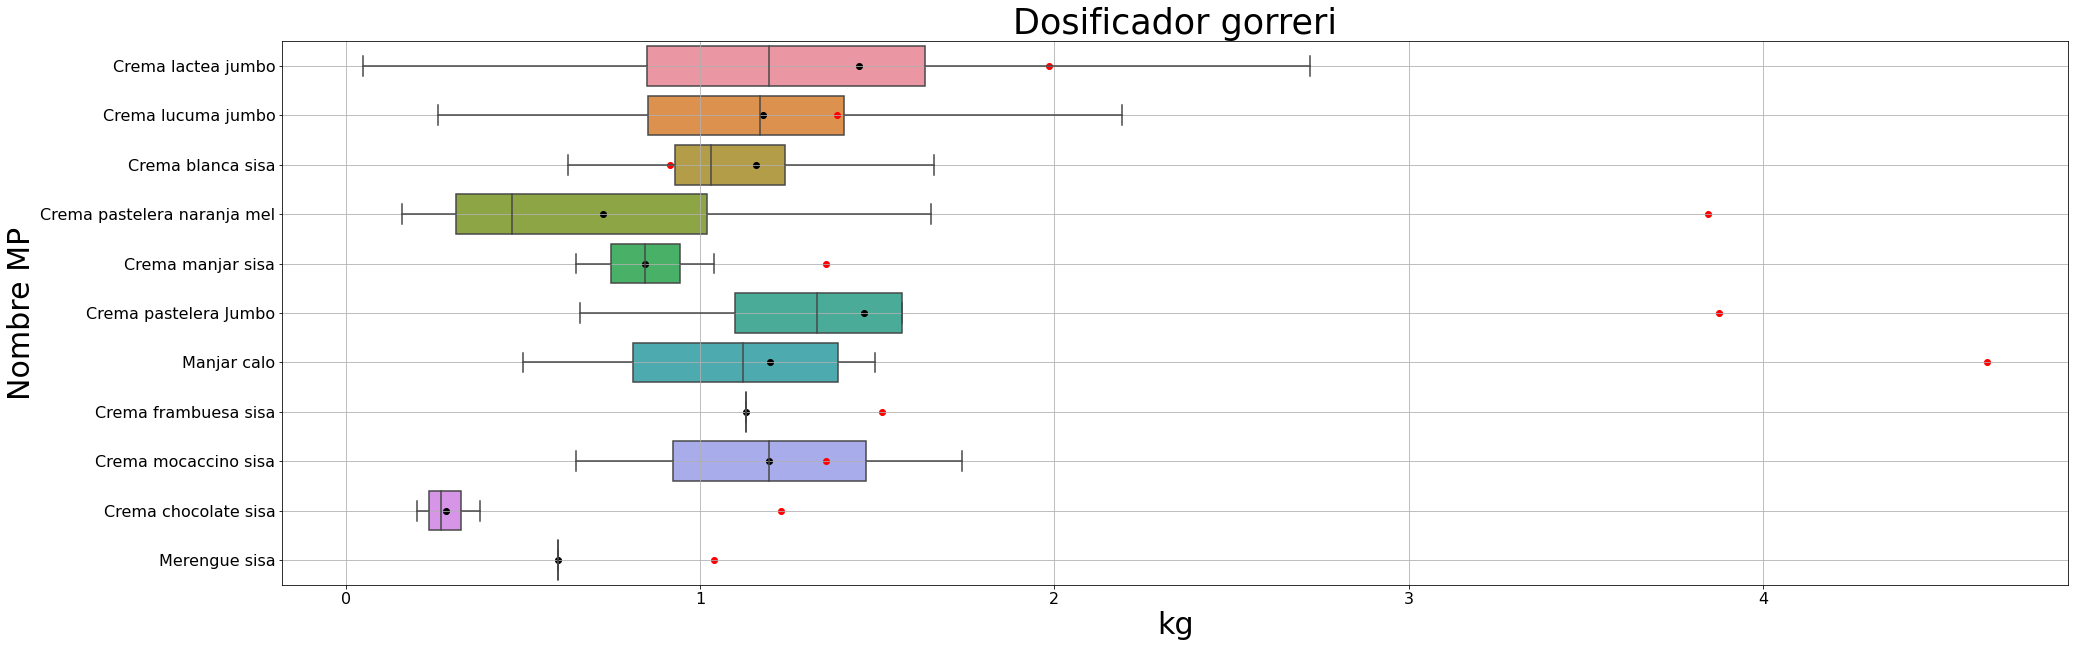

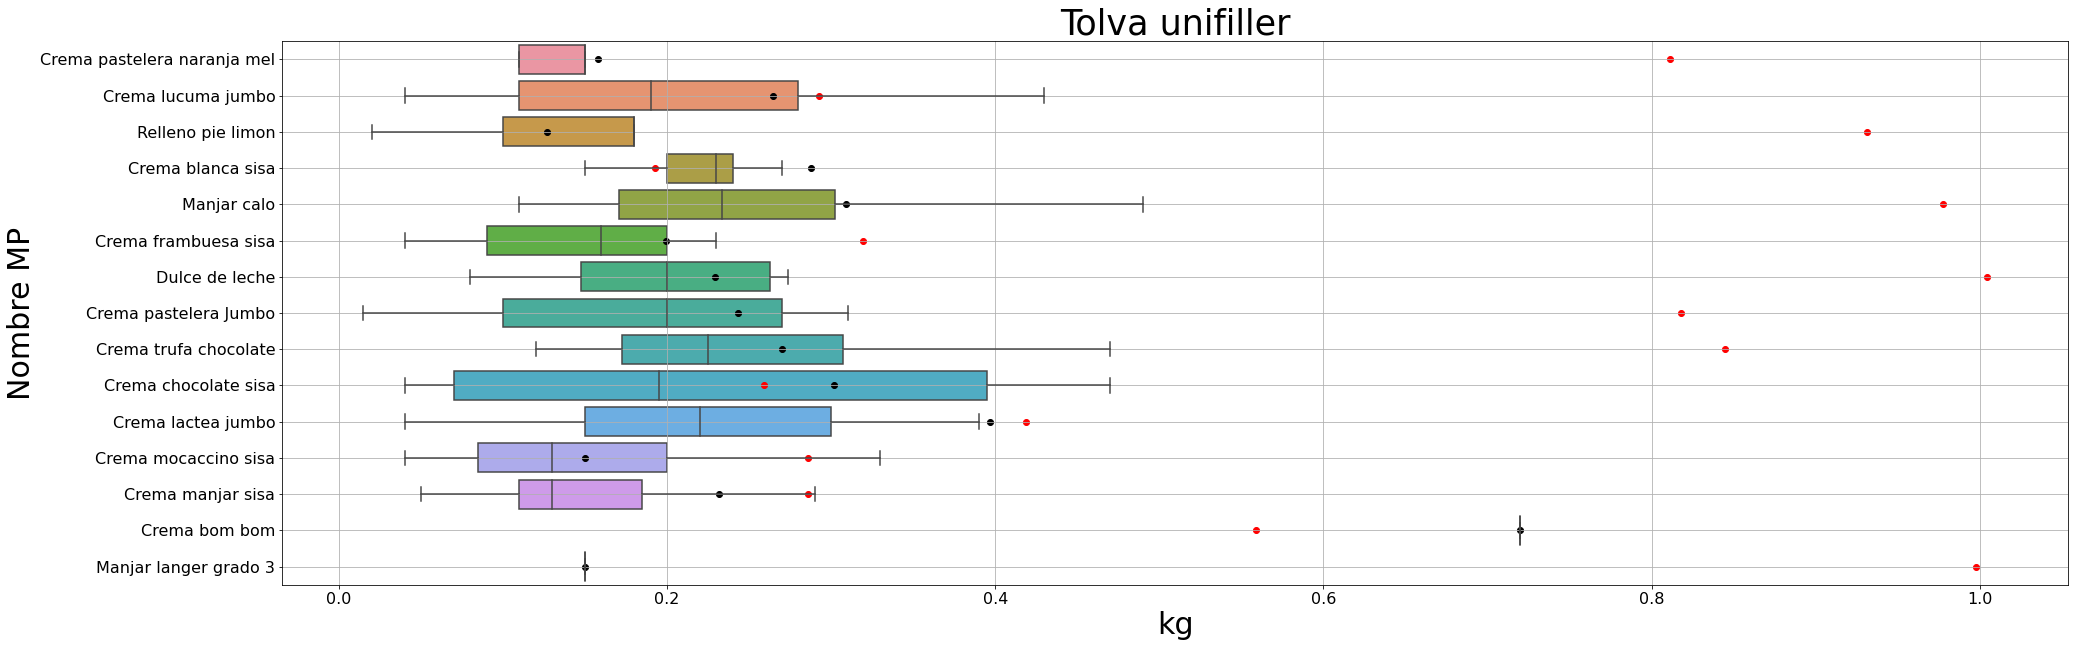

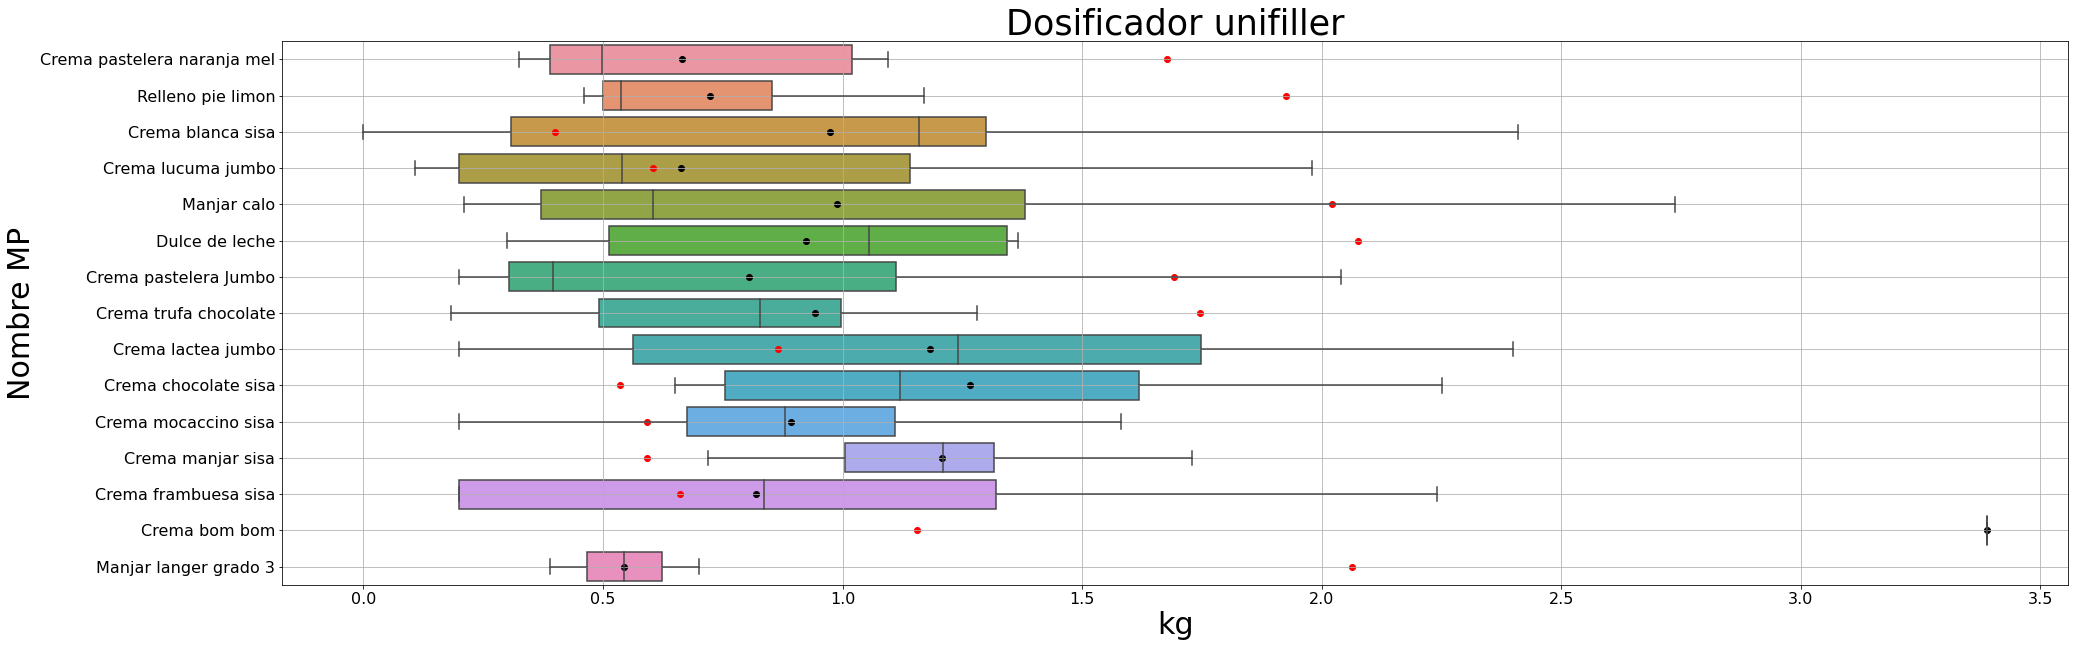

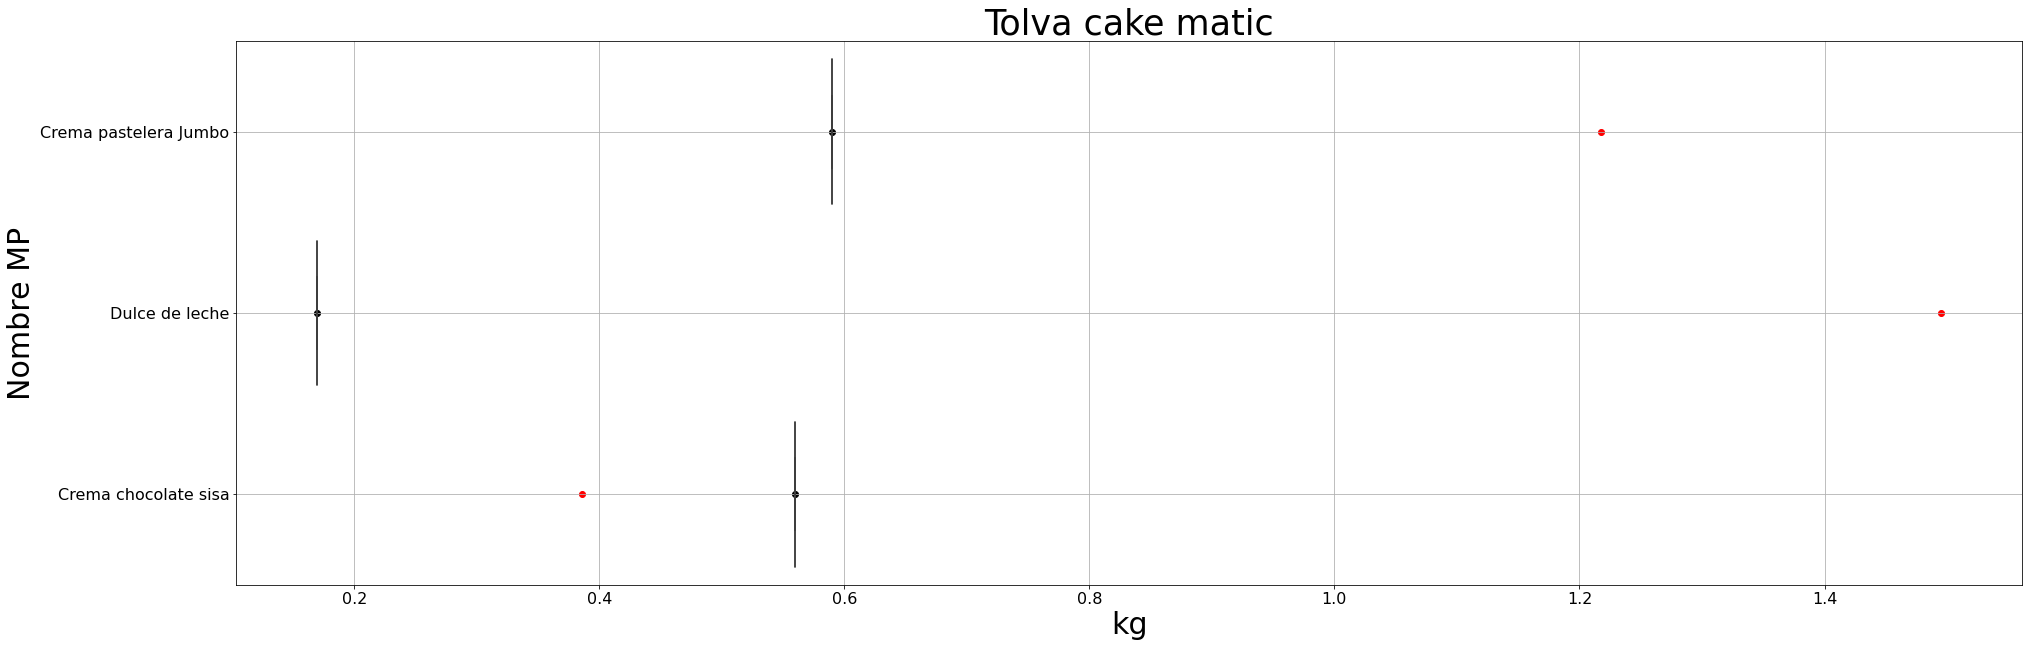

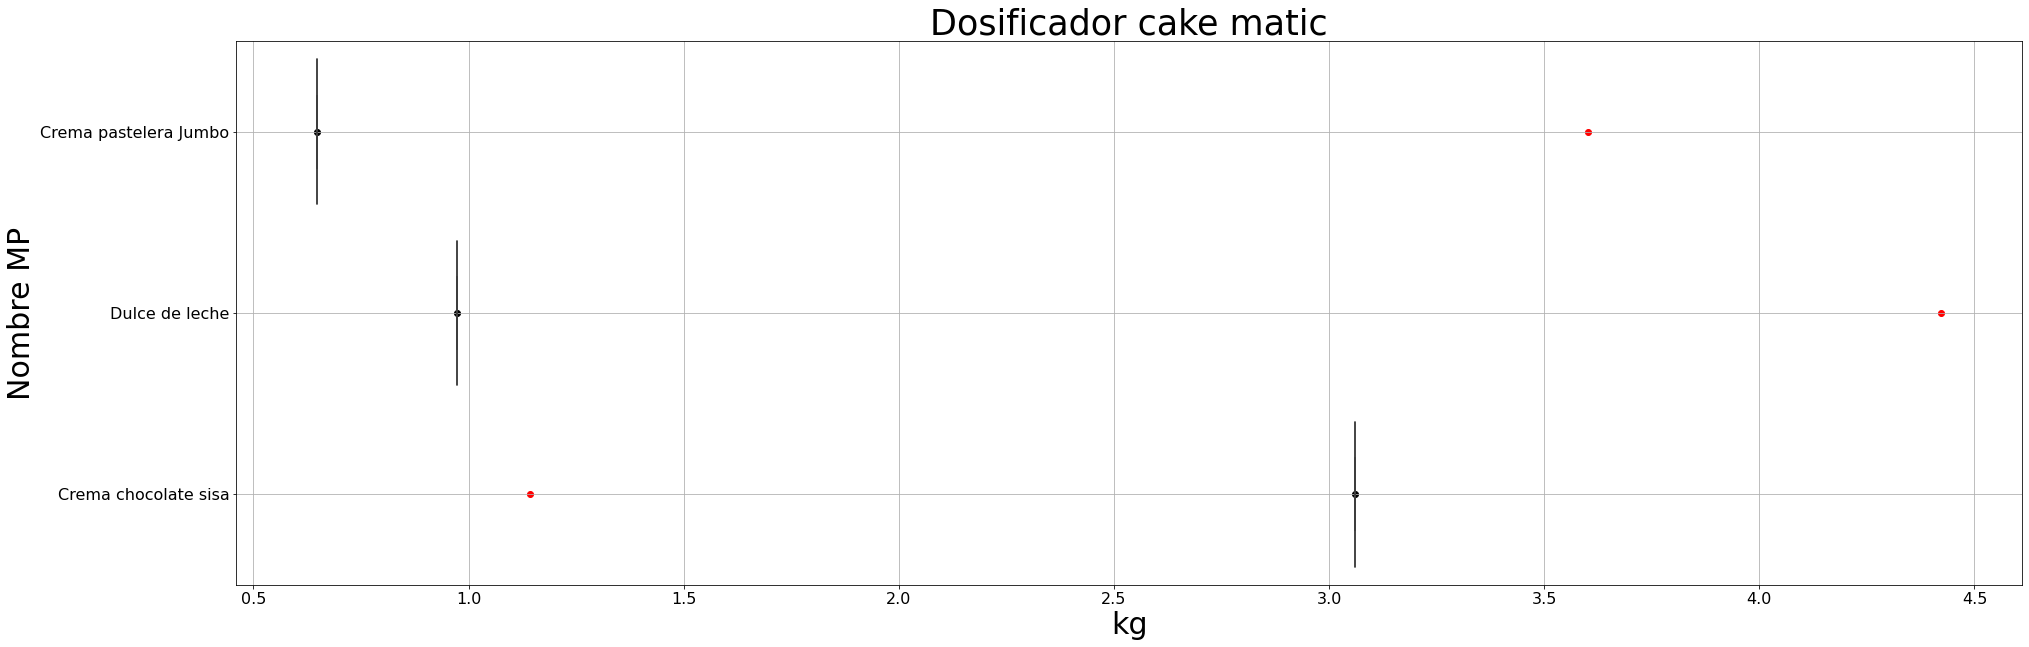

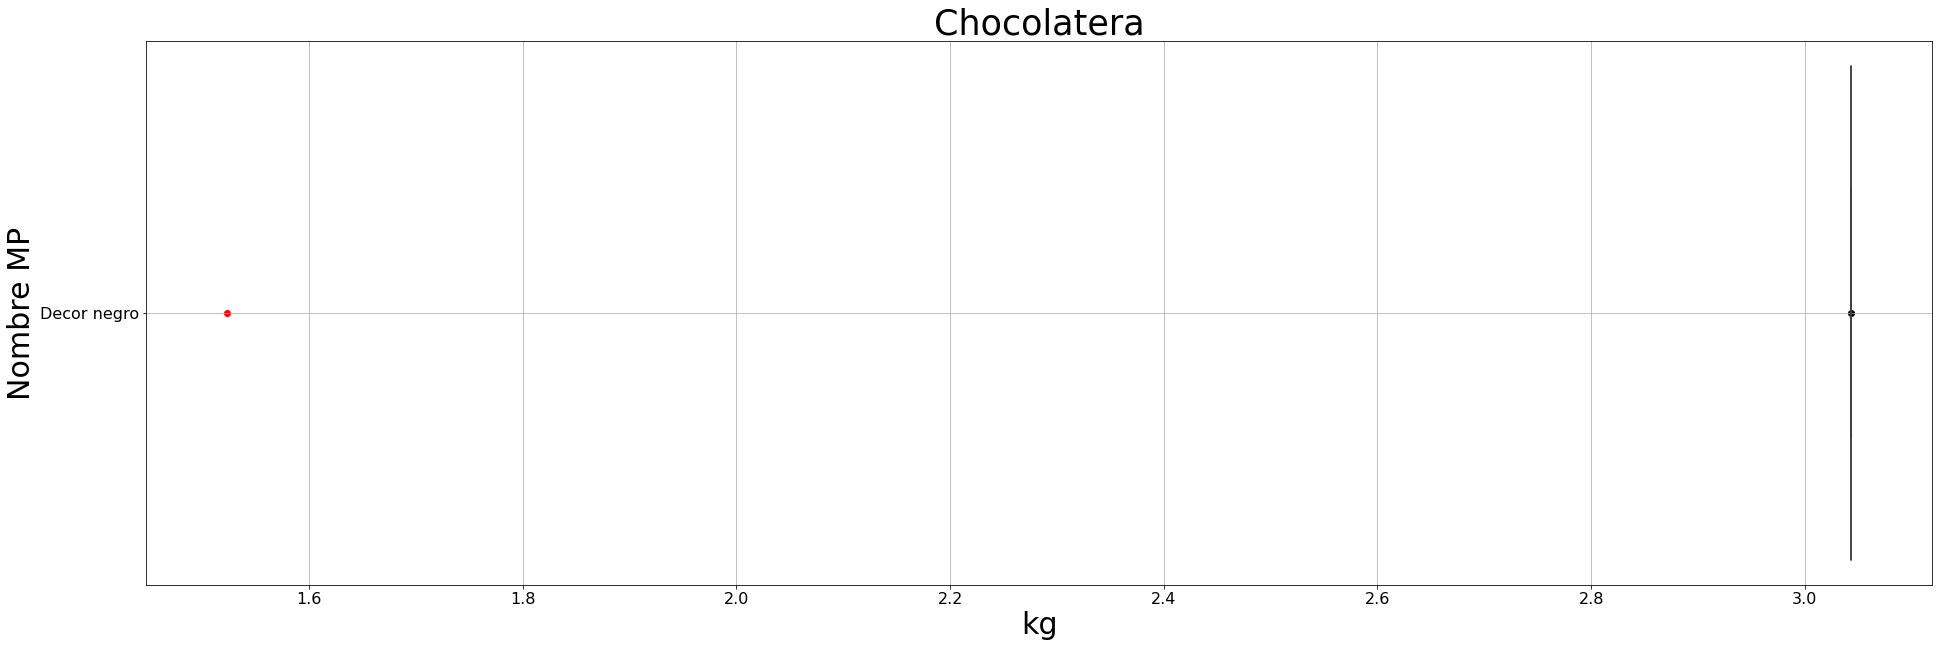

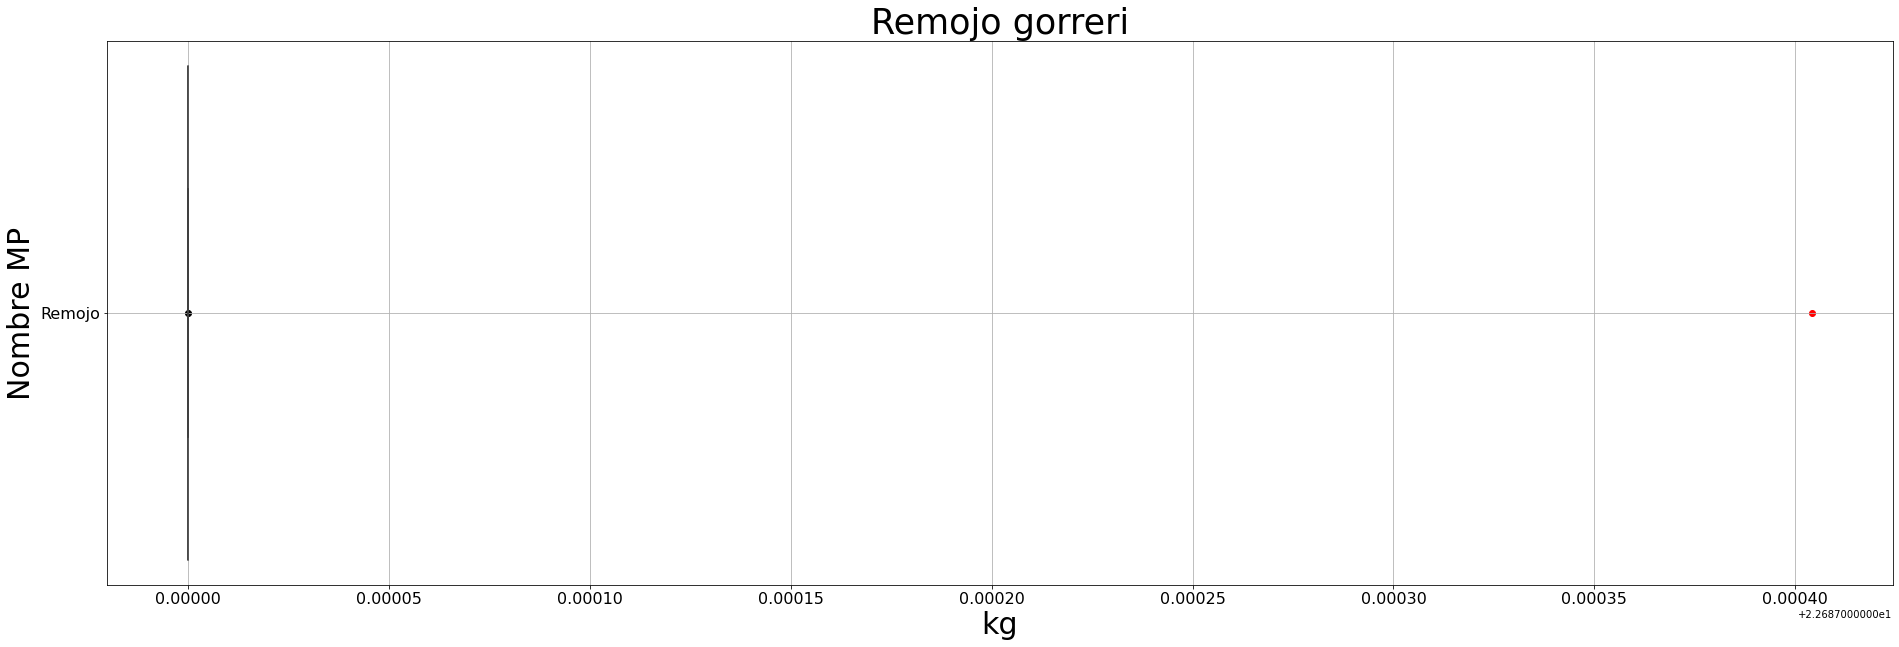

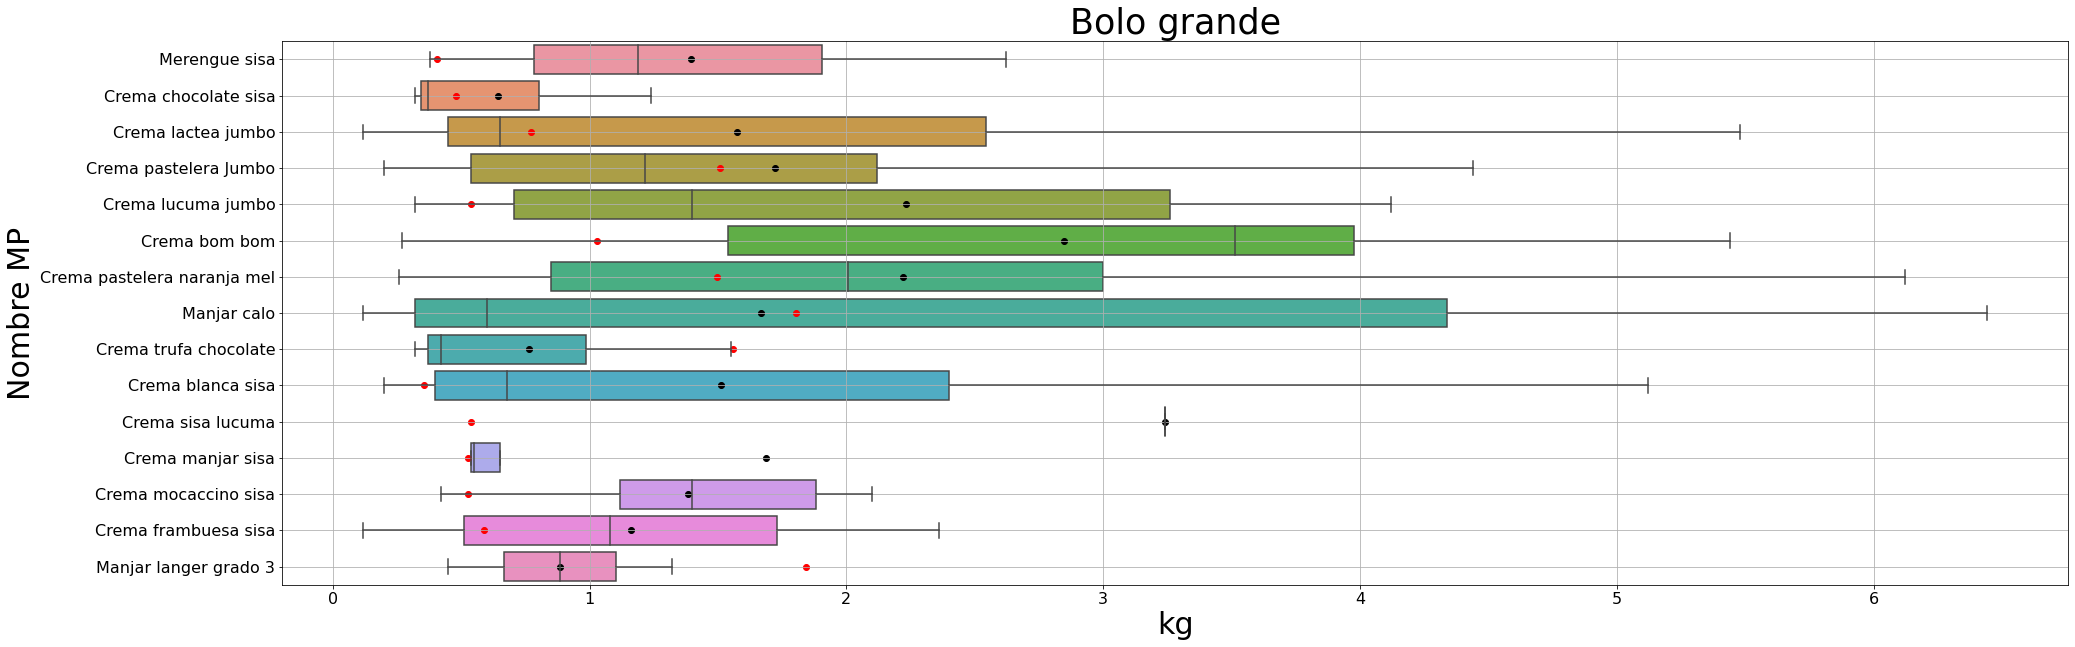

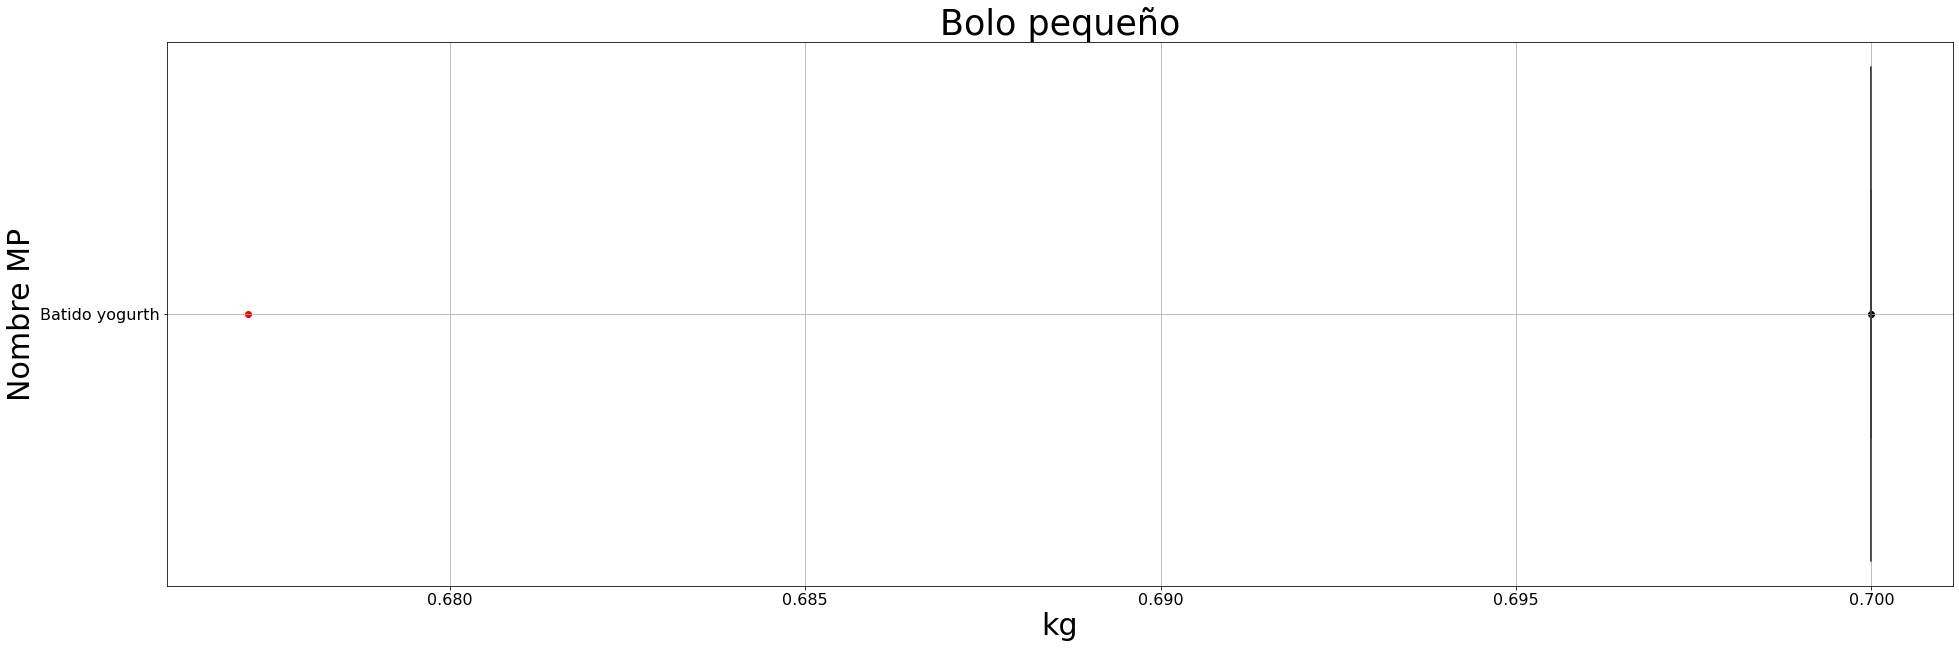

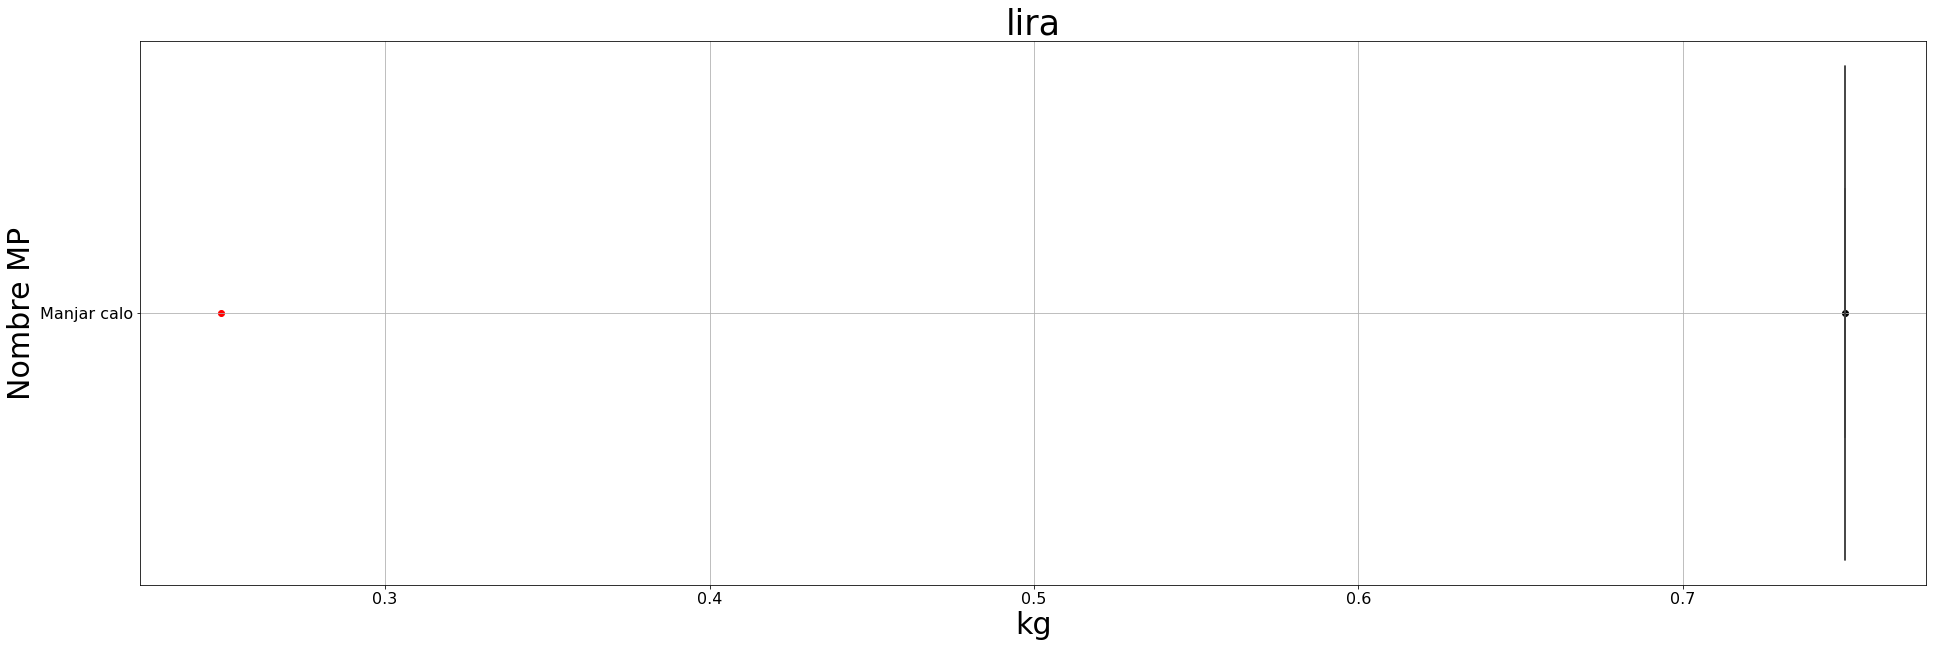

In [5]:
Utensilio = df['Utensilio'].drop_duplicates()
for Ute in Utensilio:
    df3 = df[df['Utensilio']==Ute]
    df5 = df3['Nombre MP'].drop_duplicates()
    fig, ax = plt.subplots(figsize=(32,10))
    sns.boxplot(data=df3,x='Peso perdida',y='Nombre MP',showfliers=False)
    ax.set_title(str(Ute),size=35)
    ax.set_xlabel('kg',size=30)
    ax.set_ylabel('Nombre MP',size=30)
    ax.tick_params(axis='x',labelsize=16)
    ax.tick_params(axis='y',labelsize=16)
    ax.grid()
    for mp in df5:
        gf = df3[df3['Nombre MP']==mp]
        ax.scatter(np.mean(gf['Peso perdida']),mp,c='k',label='Promedio muestral')
        ax.scatter(np.mean(gf['Perdida teorica']),mp,c='r',label='Promedio teorico')
    os.chdir('c:\\Users\\dsaldias\\Desktop\\Costo fabril\\ENEA\\Costo_fabril\\Grafico_cajas')
    plt.savefig(str(Ute)+'.jpg',format='jpg')

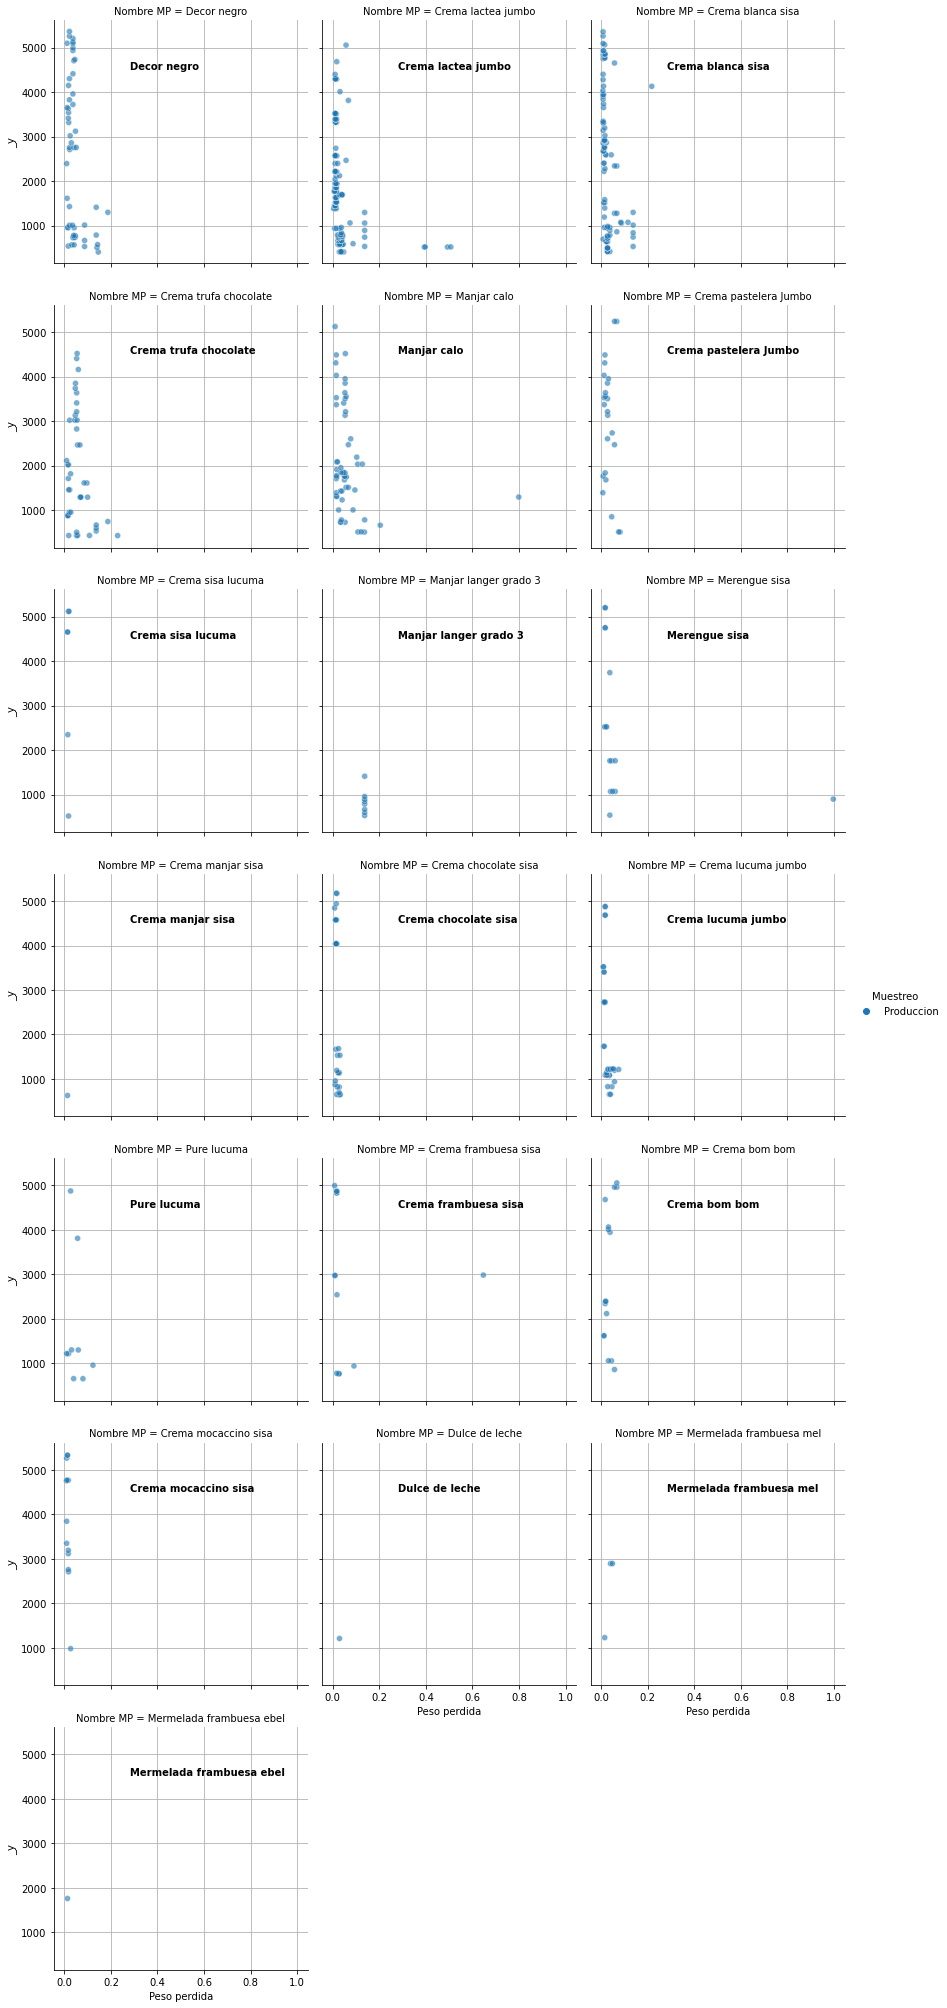

In [6]:
df2 = df[df['Utensilio']=='Manga pastelera']
j = sns.relplot(data=df2,x='Peso perdida',y=df2['Peso perdida'].index,col='Nombre MP',hue='Muestreo ',col_wrap=3,zorder=6,height=4,alpha=0.6)
for fig, ax in j.axes_dict.items():
    ax.text(.3,.8,fig,transform=ax.transAxes,fontweight='bold')
    ax.grid()
    #sns.boxplot(data=df2,x='Peso perdida',color='.9',linewidth=.5,ax=ax)
    #ax.axvline(x=np.mean(j),color='red',linestyle='--',label='Perdida teorica')
    #ax.axvline(x=np.mean(df2[(df['Nombre MP'] == fig)]),color='green',linestyle='--',label='Perdida real')
#plt.savefig('Manga_pastelera.jpg',format='jpg') #Guarda imagen en carpeta en format jpg